<a href="https://colab.research.google.com/github/OscarBit/optik/blob/master/Optik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/OscarBit/optik.git

Cloning into 'optik'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 182 (delta 85), reused 109 (delta 35), pack-reused 0
Receiving objects: 100% (182/182), 1.38 MiB | 4.48 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [3]:
import sys
sys.path.append('/content/optik')

In [23]:
from src.bulk import Bulk
from src.layer import Layer
from matplotlib import pyplot 
from matplotlib.pyplot import figure
import numpy

WAVELENGTH = numpy.arange(280,2000.5, step = 0.5)


In [30]:
layers = [
    Layer(name="MgF2", thickness=97, filename="./optik/Materials/MgF2.txt"),
    Layer(name="ZnS", thickness=41, filename="./optik/Materials/ZnS.txt"),
    Layer(name="InGaP", thickness=200, filename="./optik/Materials/InGaP.txt"),
    Layer(name="GaAs", thickness=1100, filename="./optik/Materials/GaAs.txt"),
    Layer(name="Si", thickness=1100, filename="./optik/Materials/Si.txt"),
]
cell2 = Bulk(*layers)
v1, v2 = cell2.RT()
print("Cell: \n{}\nR: {}\nT: {}".format(
    "\n".join(["  thickness: ".join([layer.name, str(layer.thickness)]) for layer in layers]),
    v1,
    v2,
))

Cell: 
MgF2  thickness: 97
ZnS  thickness: 41
InGaP  thickness: 200
GaAs  thickness: 1100
Si  thickness: 1100
R: [31.26956657 31.2160869  31.12664041 ... 17.31166104 17.31342777
 17.31514287]
T: [22.57466957 22.76306431 22.98615255 ... 80.31820303 80.31604015
 80.31414875]


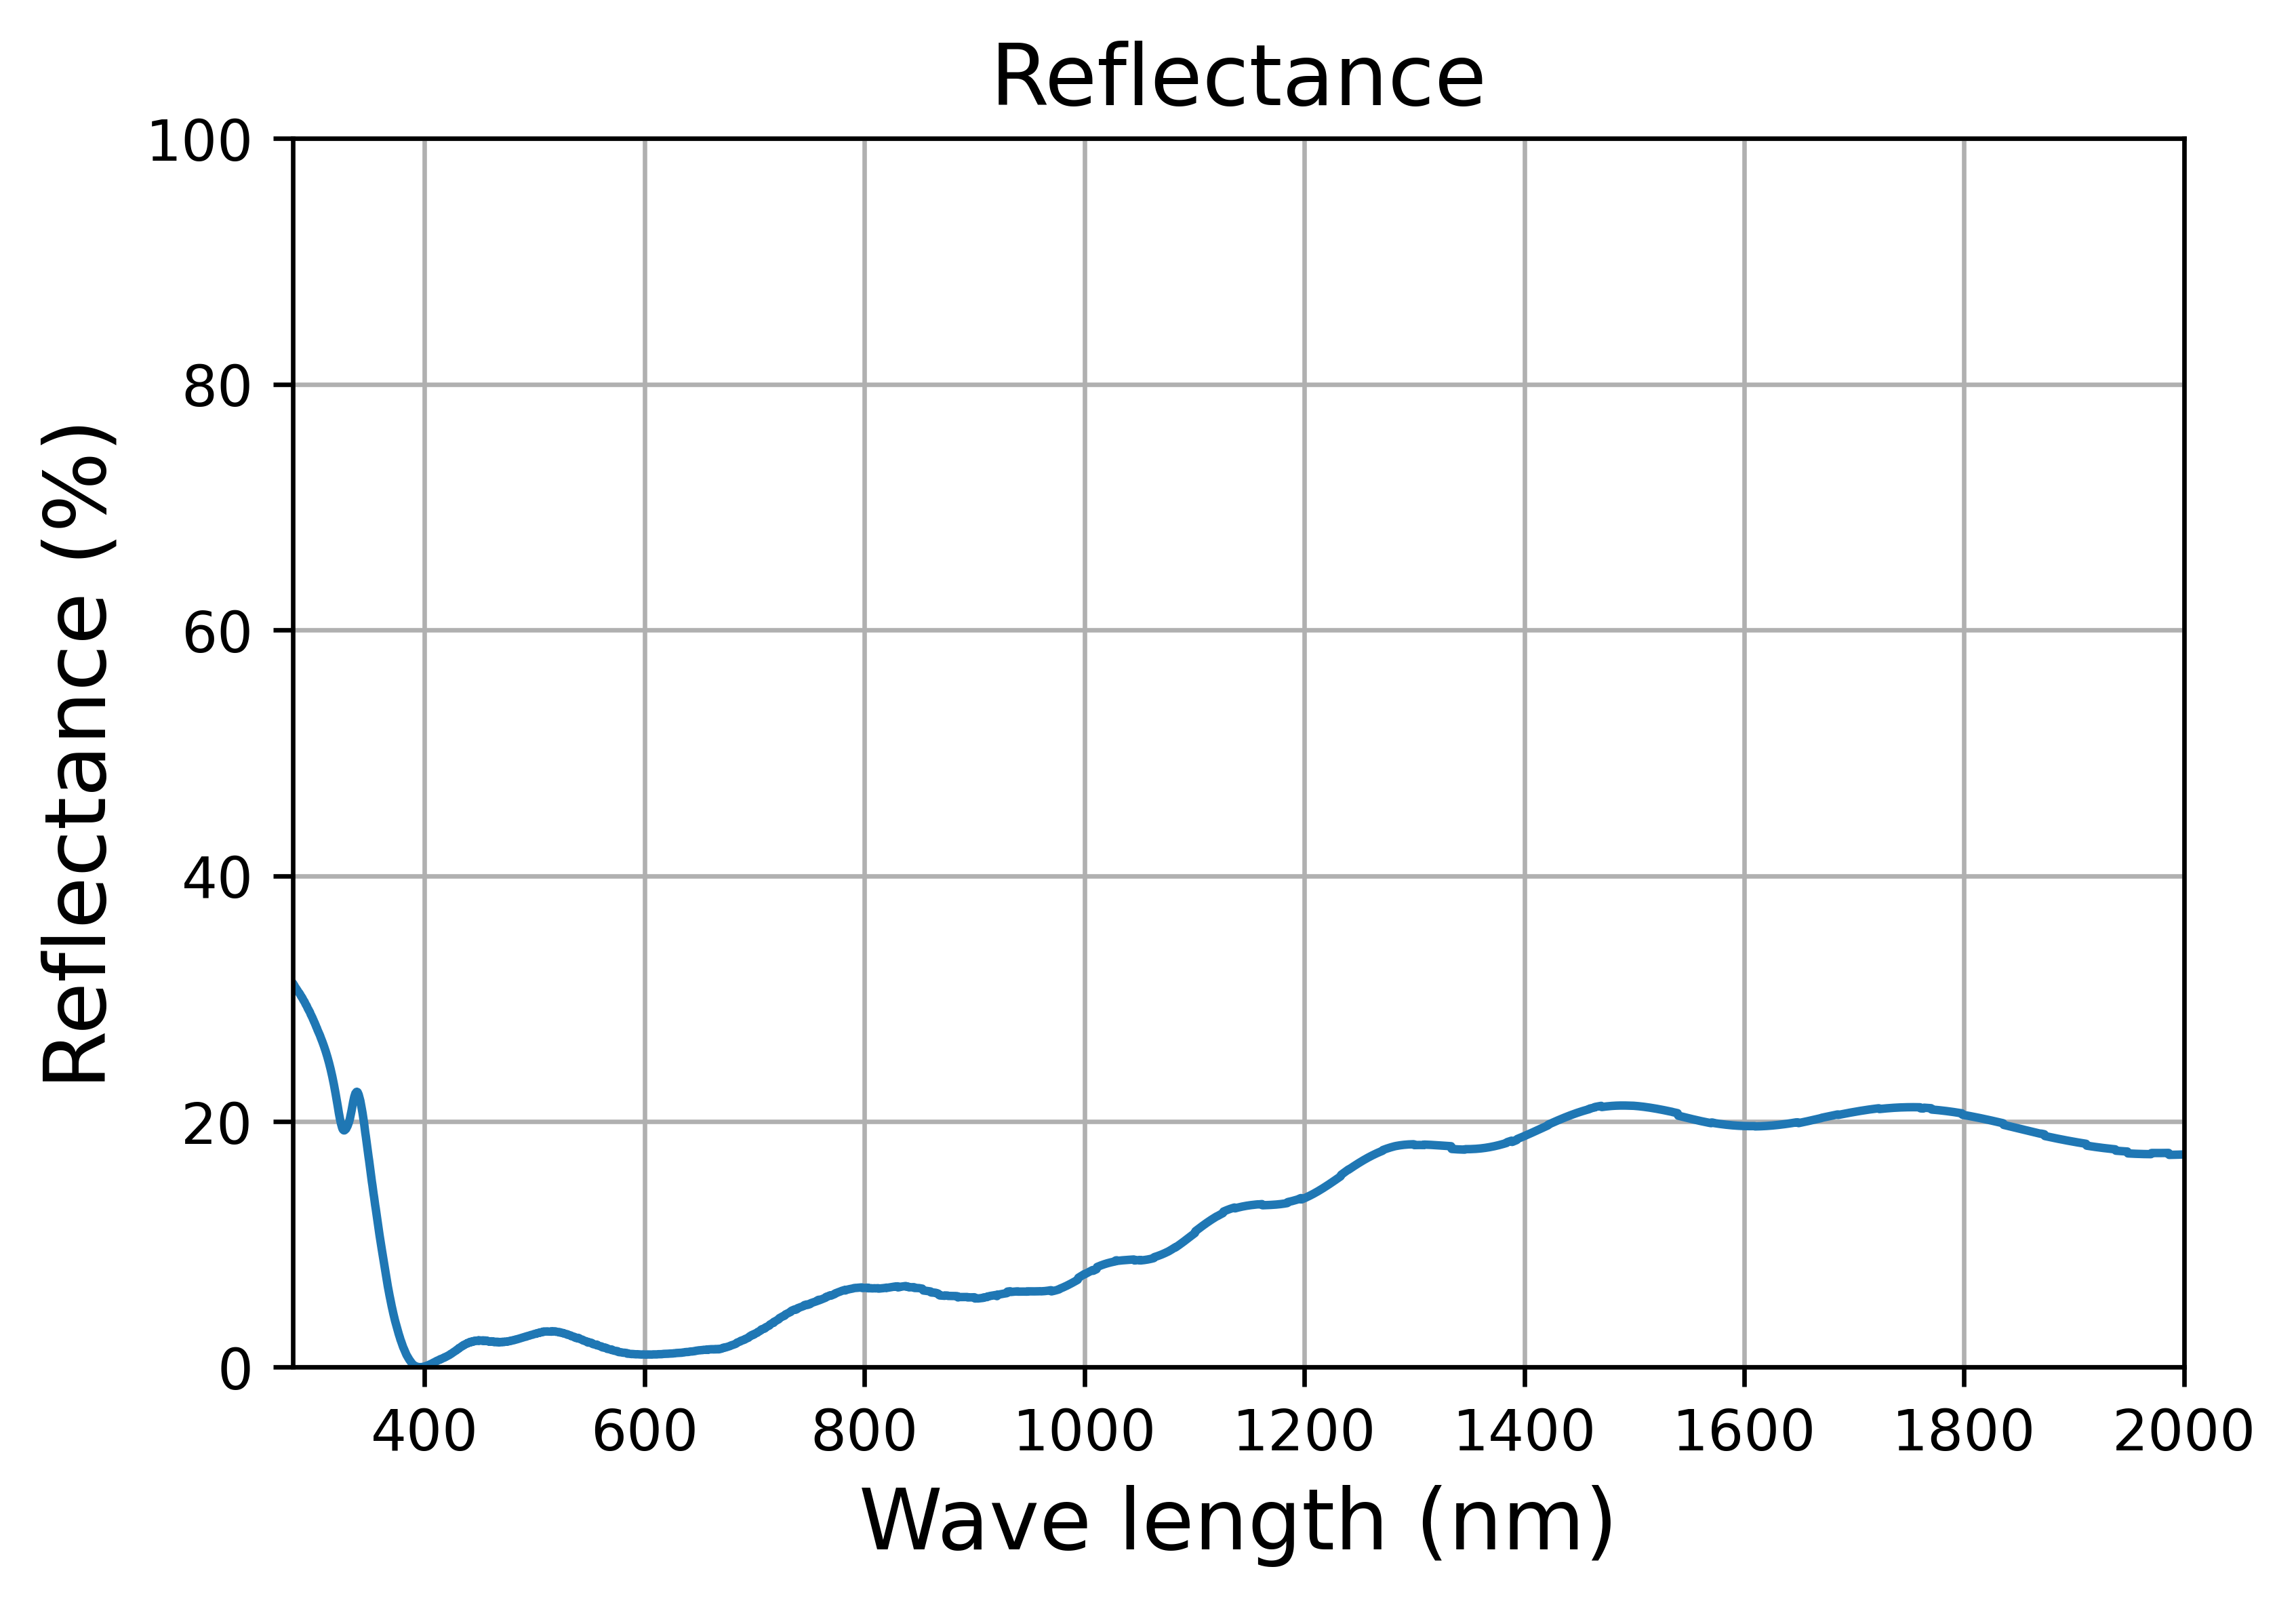

In [31]:
mydata = numpy.stack((WAVELENGTH, v1, v2), axis=-1)
numpy.savetxt("data.txt",mydata, header= "Wavelength(nm), R, T")

figure(figsize=(6, 4), dpi=600, facecolor="w", edgecolor="k")
pyplot.plot(WAVELENGTH, v1)
pyplot.xlabel("Wave length (nm)", {"fontsize": 15})
pyplot.ylabel("Reflectance (%)", {"fontsize": 15})
pyplot.title("Reflectance", {"fontsize": 15})
pyplot.axis([280, 2000, 0, 100])
pyplot.grid(True)
pyplot.savefig("Reflectance.pdf")
# plt.show()



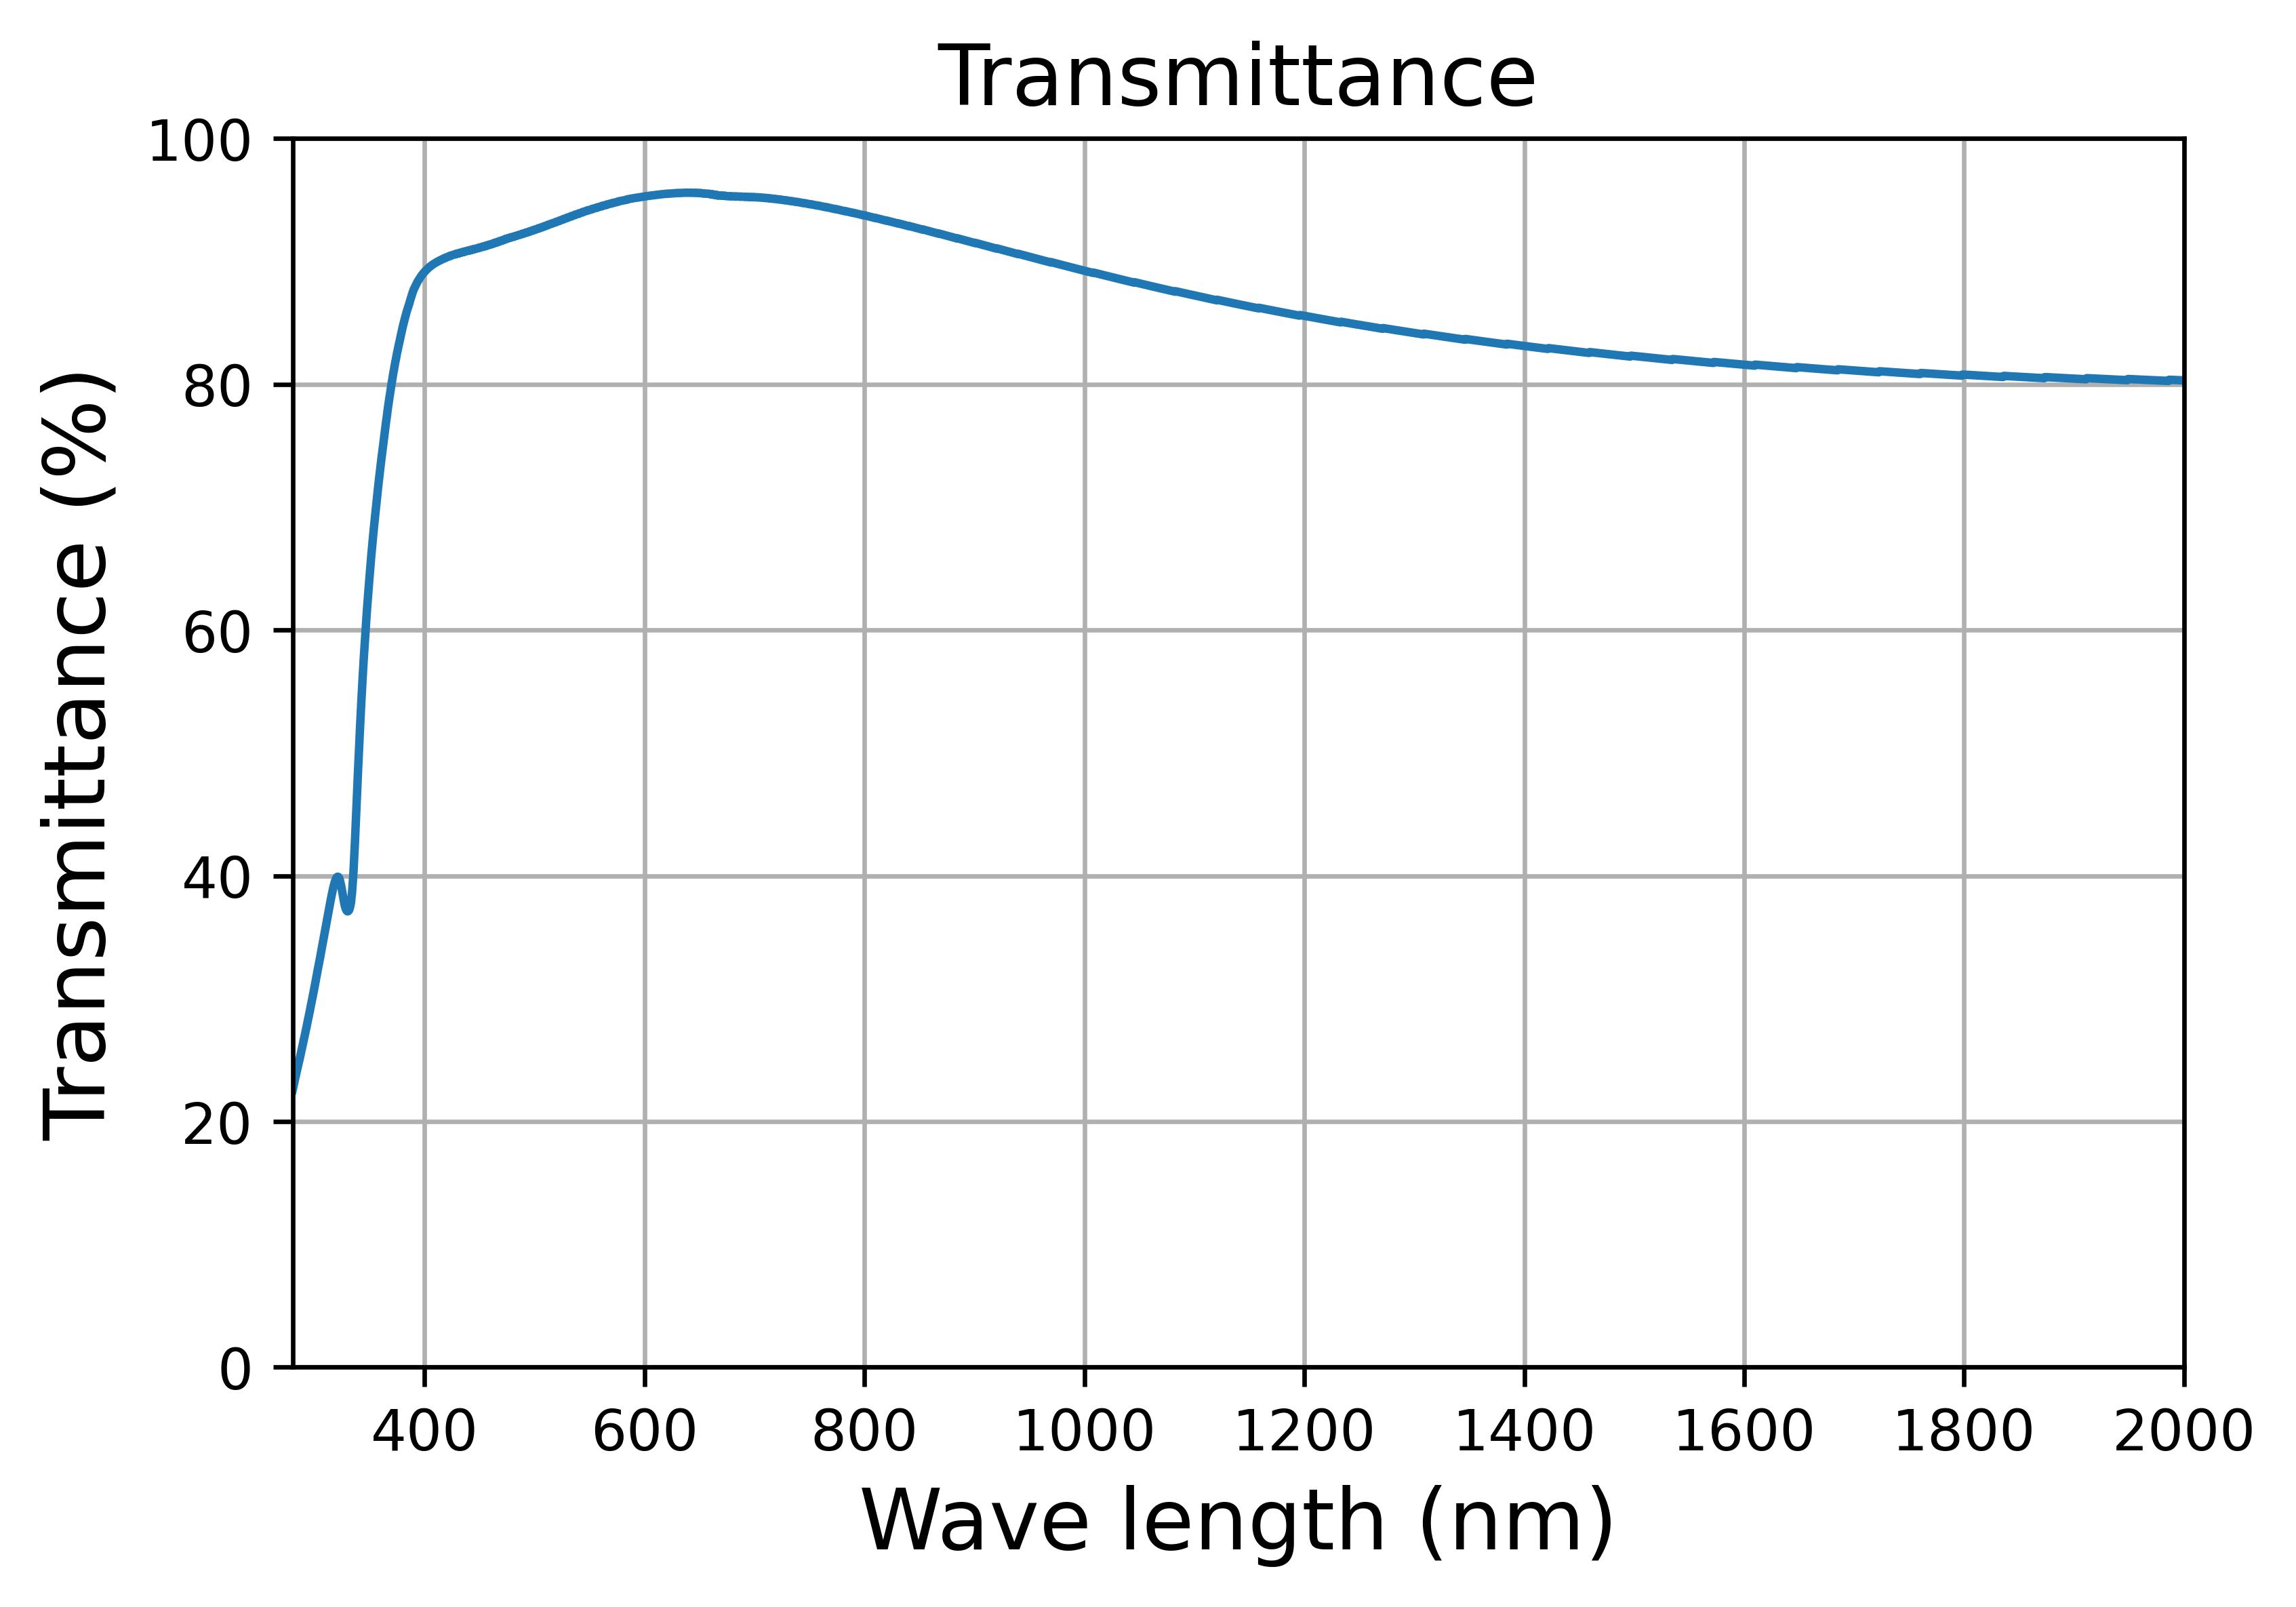

In [32]:
figure(figsize=(6, 4), dpi=600, facecolor="w", edgecolor="k")
pyplot.plot(WAVELENGTH, v2)
pyplot.xlabel("Wave length (nm)", {"fontsize": 15})
pyplot.ylabel("Transmittance (%)", {"fontsize": 15})
pyplot.title("Transmittance", {"fontsize": 15})
pyplot.axis([280, 2000, 0, 100])
pyplot.grid(True)
pyplot.savefig("Transmittance.pdf")
# plt.show()

In [29]:
from google.colab import files
output = ["/content/Reflectance.pdf", "/content/data.txt", "/content/Transmittance.pdf"]

for file in output:
  files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>